**Correlação entre as Despesas Pagas para o Ensino Fundamental e os Indicadores Educacionais**

In [12]:
import pandas as pd
import seaborn as sns

In [13]:
#filtro a tabela da Siconfi para o Rio e para as Despesas Pagas no Ensino Fundamental
#filtro também o ano para corresponder com os anos da outra tabela

siconfi=pd.read_csv('siconfi.csv')

siconfi_rio_ef=siconfi[siconfi['id_municipio']==3304557]
siconfi_rio_ef=siconfi_rio_ef[(siconfi_rio_ef['estagio']=='Despesas Pagas') & (siconfi_rio_ef['conta']=='Ensino Fundamental')]
siconfi_rio_ef=siconfi_rio_ef[(siconfi_rio_ef['ano']<=2019) & (siconfi_rio_ef['ano']%2!=0)]

colunas=['ano', 'valor']

siconfi_rio_ef=siconfi_rio_ef[colunas]

siconfi_rio_ef=siconfi_rio_ef.dropna(axis=0)

siconfi_rio_ef=siconfi_rio_ef.reset_index()

siconfi_rio_ef=siconfi_rio_ef.drop(['index'], 1)

siconfi_rio_ef

c:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ano,valor
0,2013,2.700569e+09
1,2015,3.120392e+09
2,2017,3.190383e+09
3,2019,3.657024e+09


In [14]:
#filtro a tabela do Ideb para o Rio e para o Ensino Fundamental na rede publica
#filtro também o ano para corresponder com o anos da outras tabelas

ideb=pd.read_csv('ideb.csv')

ideb_rio_ef=ideb[(ideb['id_municipio']==3304557)]
ideb_rio_ef=ideb_rio_ef[(ideb_rio_ef['ensino']=='fundamental') & (ideb_rio_ef['rede']=='publica')]
ideb_rio_ef=ideb_rio_ef[ideb_rio_ef['ano']>=2013]

colunas=['ano', 'indicador_rendimento', 'nota_saeb_media_padronizada', 'ideb']

ideb_rio_ef=ideb_rio_ef[colunas]

ideb_rio_ef=ideb_rio_ef.dropna(axis=0)

ideb_rio_ef=ideb_rio_ef.groupby('ano', as_index=False).mean()

ideb_rio_ef

,ano,indicador_rendimento,nota_saeb_media_padronizada,ideb
0,2013,0.881485,5.529359,4.90
1,2015,0.879882,5.682918,5.00
2,2017,0.903808,5.764562,5.20
3,2019,0.938875,5.692353,5.35


In [15]:
#junto os dados

corrdata=siconfi_rio_ef

for column in ideb_rio_ef.columns:
    if column!='ano':
        corrdata=corrdata.join(ideb_rio_ef[column])

corrdata

,ano,valor,indicador_rendimento,nota_saeb_media_padronizada,ideb
0,2013,2.700569e+09,0.881485,5.529359,4.90
1,2015,3.120392e+09,0.879882,5.682918,5.00
2,2017,3.190383e+09,0.903808,5.764562,5.20
3,2019,3.657024e+09,0.938875,5.692353,5.35


In [16]:
#manuseio alguns elementos da tabela para realisar a Correlação de Pearson

corrdata=corrdata.drop(['ano'], 1)

corrdata=corrdata.corrwith(corrdata['valor'])

corrdata=pd.DataFrame(corrdata).transpose()

corrdata=corrdata.rename(index={0: 'Despesas Pagas'})

corrdata=corrdata.drop(['valor'], 1)

corrdata

,indicador_rendimento,nota_saeb_media_padronizada,ideb
Despesas Pagas,0.888297,0.672297,0.940511


<AxesSubplot:title={'center':'Correlação entre as Despesas Pagas e os Indicadores Educacionais'}>

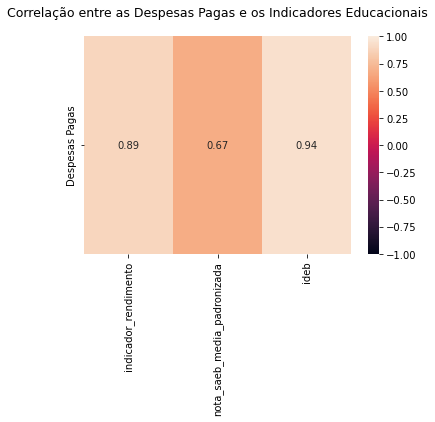

In [17]:
#gráfico de correlação

heatmap=sns.heatmap(corrdata, vmin=-1, vmax=1, annot=True)
heatmap.set_title("Correlação entre as Despesas Pagas e os Indicadores Educacionais", fontdict={'fontsize':12.5}, pad=20)
heatmap